In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import zscore
import fix_yahoo_finance as yf
from yahoofinancials import YahooFinancials
%matplotlib inline

In [2]:
df = pd.read_csv('earningsCallAll_stdName.csv', encoding = 'ISO-8859-1')

In [3]:
df['Date_adj'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [4]:
Speakers = df['Speaker'].unique()
Companies = df['Company'].unique()

In [5]:
temp = df.groupby(['Date_adj']).mean()

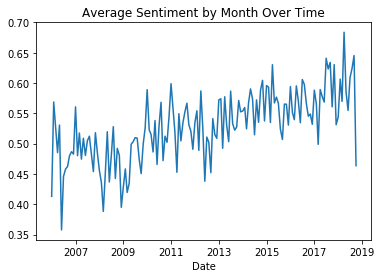

In [6]:
plt.plot(temp.SentimentScore)
plt.title('Average Sentiment by Month Over Time')
plt.xlabel('Date')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


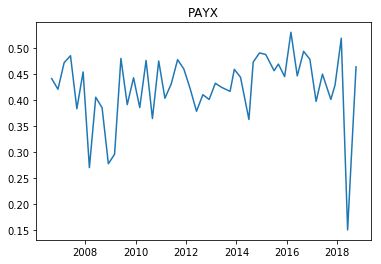

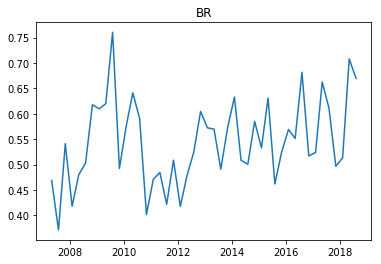

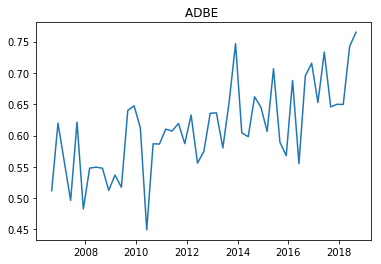

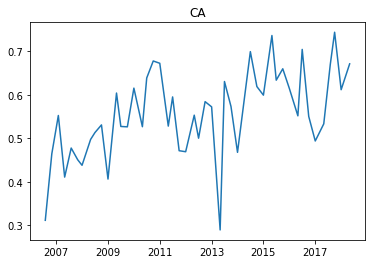

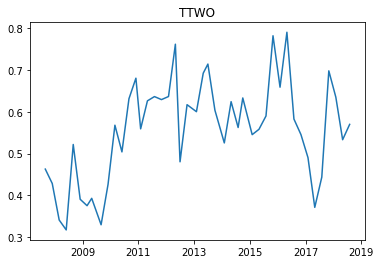

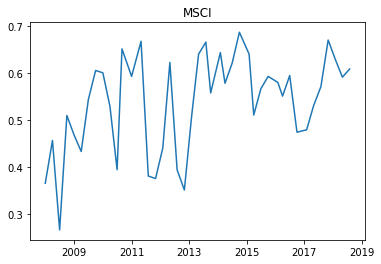

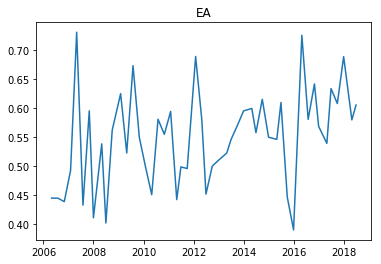

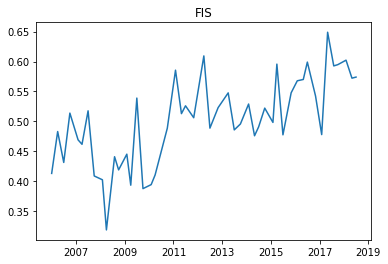

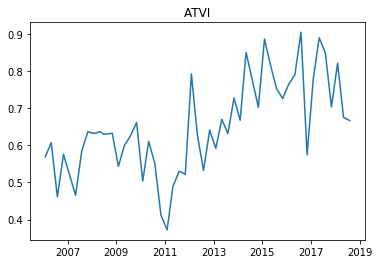

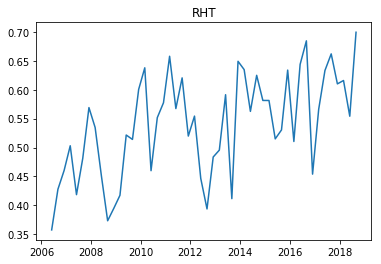

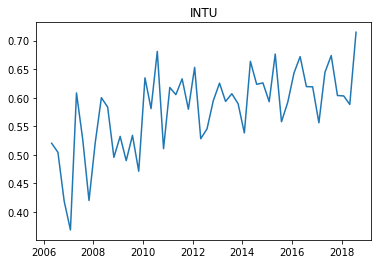

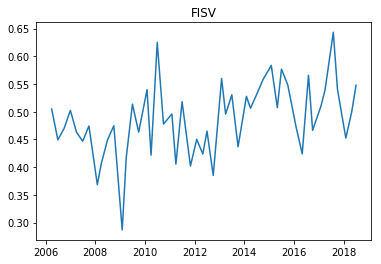

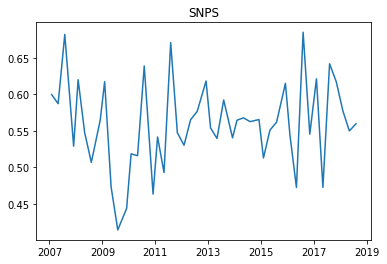

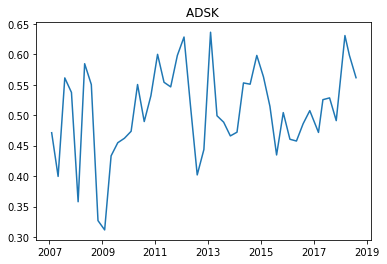

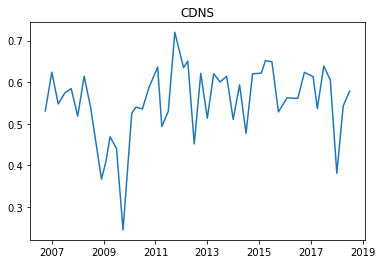

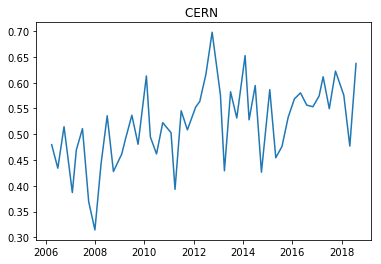

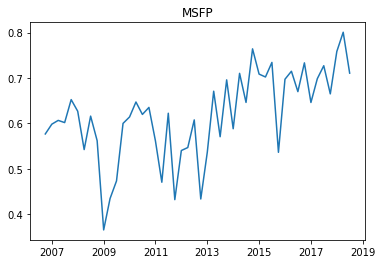

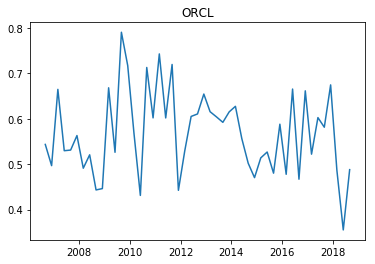

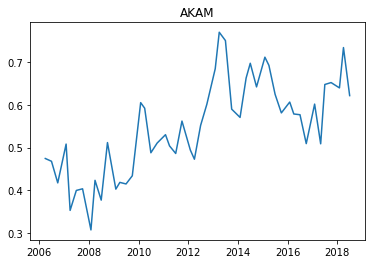

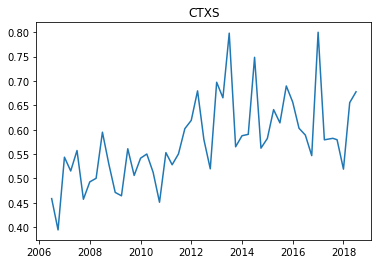

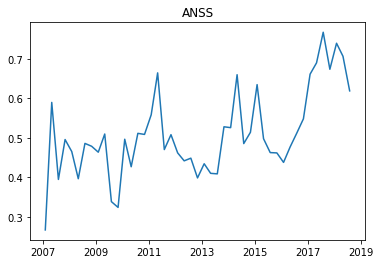

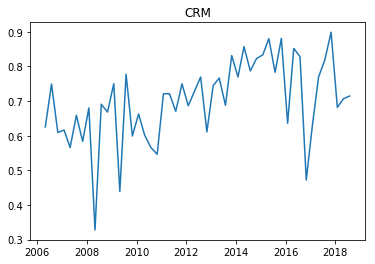

In [7]:
for i in range(0, len(Companies)):
    plt.figure()
    temp = df[df['Company'] == Companies[i]]
    temp = temp.groupby(['Date_adj']).mean()
    plt.plot(temp.SentimentScore)
    plt.title(Companies[i])
    

In [8]:
people = df.groupby(['standardized_name']).count()['SentimentScore'].sort_values() 
sigPeople = people[people > 20].index

In [9]:
avgSent = df.groupby(['standardized_name'])['SentimentScore'].mean()

In [10]:
col = df.columns.append(pd.Index(['Z']))
Zscore = pd.DataFrame(columns = col)
for i in sigPeople:
    temp = df[df['standardized_name'] == i]
    mu = temp['SentimentScore'].mean()
    std = temp['SentimentScore'].std()
    temp['Z'] = zscore(temp.SentimentScore)
    Zscore = Zscore.append(temp)   

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
df_Z = pd.merge(df, Zscore)

In [12]:
temp = df_Z.groupby(['Date_adj']).mean()

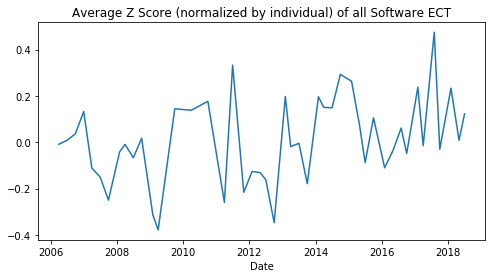

In [199]:
plt.figure(figsize=(8, 4))
plt.plot(temp.Z)
plt.title('Average Z Score (normalized by individual) of all Software ECT')
plt.xlabel('Date')
plt.show()

In [14]:
df_Z.groupby(['standardized_name']).mean().sort_values('SentimentScore', ascending = True)[['SentimentScore']].head(5)

,SentimentScore
standardized_name,
Kristin Mulvihill Southey,0.076532
Mike Saviage,0.128244
Kenneth Bond,0.140879
David Havlek,0.151514
Bill Koefoed,0.223470


In [15]:
df_Z.groupby(['Company']).mean().sort_values('SentimentScore', ascending = False)[['SentimentScore']].head(5)

,SentimentScore
Company,
CRM,0.681592
ATVI,0.621215
MSFP,0.612194
ADBE,0.604588
INTU,0.584823


In [17]:
people

standardized_name
Ignatius Njoku                1
Timothy Thornton              1
Tim Voges                     1
Thomas Michael Roderick       1
Dean Gianoukos                1
Mark Kelley                   1
Andy Miedler                  1
Mary Vegh                     1
Matthew Wells                 1
Michael Mankowski             1
Stephen C. Davidson           1
Ariel Hughes                  1
Mike Ellis                    1
Monica Langley                1
Natalie Temple                1
Nate Cunningham               1
Nick P. Bertolotti            1
Avi Steiner                   1
Brandon Hoffman               1
Reid Menge                    1
Randy Katz                    1
Sasan K. Goodarzi             1
Burke F. Norton               1
Bill Lennan                   1
Doug Campbell                 1
Bill Kreher                   1
Paul Sams                     1
Chris P. Hickey               1
Chris Ross                    1
Christopher Ford              1
                      

In [30]:
ER = 'Efrain Rivera' # CFO of PAYX

In [31]:
df_Z.head()

,Unnamed: 0,index,Company,Content,Date,Section,SentimentScore,Speaker,Type,Month,Year,Day,Date_adj,name,standardized_name,Z
0,0,2,PAYX,"Hey. Thank you, guys. I appreciate you taking...",2014-03-27,Q&A,0.8818,Jason A. Kupferberg,Q,3,2014,1,2014-03-01,NaN,Jason A. Kupferberg,1.114345
1,1,3,PAYX,"Yeah, Jason, this is Marty. Necessarily, we d...",2014-03-27,Q&A,0.9614,Martin Mucci,A,3,2014,1,2014-03-01,NaN,Martin Mucci,1.049677
2,2,4,PAYX,"And Jason, just to add what Marty said, we do...",2014-03-27,Q&A,0.0000,Efrain Rivera,A,3,2014,1,2014-03-01,NaN,Efrain Rivera,-0.844022
3,3,5,PAYX,Okay. That's helpful. And I think in the past...,2014-03-27,Q&A,0.7351,Jason A. Kupferberg,Q,3,2014,1,2014-03-01,NaN,Jason A. Kupferberg,0.692473
4,4,6,PAYX,"Yeah, we're still feeling good retention from...",2014-03-27,Q&A,0.8617,Martin Mucci,A,3,2014,1,2014-03-01,NaN,Martin Mucci,0.798884


In [73]:
df_ER = df_Z[df_Z['standardized_name'] == ER]


In [74]:
date = df_ER.groupby(['Date']).size().reset_index(name='counts')
sigDates = date[date.counts > 10].Date

In [75]:
df_ER = df_ER[df_ER['Date'].isin(sigDates)]

In [163]:

start = '2011-01-01'
end = '2018-11-30'
data = yf.download('PAYX', start, end)
data = data.rename(columns={ data.columns[4]: 'PAYX' })
data = data[['PAYX']]

[*********************100%***********************]  1 of 1 downloaded


In [164]:
data['Month'] = pd.DatetimeIndex(data.index).to_period('M')

In [165]:
data = data.groupby(data.Month).mean()

In [166]:
data.index = data.index.to_timestamp('M')

In [167]:
data['log_ret'] = np.log(data.PAYX) - np.log(data.PAYX.shift(1))

In [168]:
data.head()

,PAYX,log_ret
Month,,
2011-01-31,24.270825,NaN
2011-02-28,25.206942,0.037844
2011-03-31,24.567611,-0.025690
2011-04-30,24.679964,0.004563
2011-05-31,24.721583,0.001685


Text(0.5,1,'Efrain Rivera')

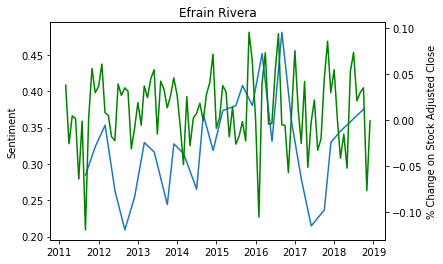

In [172]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Sentiment')

temp = df_ER
temp = temp.groupby(['Date_adj']).mean()
ax1.plot(temp.SentimentScore)

ax2 = ax1.twinx() 
ax2.set_ylabel('% Change on Stock Adjusted Close')

ax2.plot(data.log_ret, color = 'green')
plt.title(ER)

In [173]:
JY = 'Jeffery W. Yabuki' # CEO of Fiserv

In [174]:
df_JY = df_Z[df_Z['standardized_name'] == JY]


In [175]:
date = df_JY.groupby(['Date']).size().reset_index(name='counts')
sigDates = date[date.counts > 10].Date

In [176]:
df_JY = df_JY[df_JY['Date'].isin(sigDates)]

In [177]:

start = '2006-01-01'
end = '2018-11-30'
data = yf.download('FISV', start, end)
data = data.rename(columns={ data.columns[4]: 'FISV' })
data = data[['FISV']]

[*********************100%***********************]  1 of 1 downloaded


In [178]:
data['Month'] = pd.DatetimeIndex(data.index).to_period('M')

In [179]:
data = data.groupby(data.Month).mean()

In [180]:
data.index = data.index.to_timestamp('M')

In [181]:
data['log_ret'] = np.log(data.FISV) - np.log(data.FISV.shift(1))

In [182]:
data.head()

,FISV,log_ret
Month,,
2006-01-31,11.046125,NaN
2006-02-28,10.469211,-0.053641
2006-03-31,10.555217,0.008182
2006-04-30,10.597632,0.004010
2006-05-31,10.991932,0.036531


Text(0.5,1,'Jeffery W. Yabuki: CEO of Fiserv')

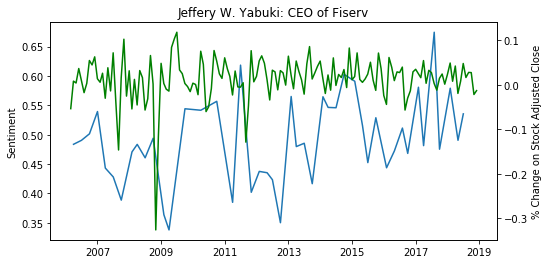

In [190]:

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.set_ylabel('Sentiment')

temp = df_JY
temp = temp.groupby(['Date_adj']).mean()
ax1.plot(temp.SentimentScore)

ax2 = ax1.twinx() 
ax2.set_ylabel('% Change on Stock Adjusted Close')

ax2.plot(data.log_ret, color = 'green')
plt.title(JY + ': CEO of Fiserv')


### Topic Modeling

One Company

In [21]:
df_MSFT = df_Z[df_Z['Company'] == 'MSFP']

In [22]:
from inscriptis import get_text
import glob
from lxml import html
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [23]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

def clean(doc):
    temp = doc.replace('\n', ' ')
    temp = temp.replace('\xa0', ' ')
    temp = temp.replace('\x94', ' ')
    temp = temp.replace('\x92', ' ')
    temp = temp.replace('\x97', ' ')
    temp = temp.replace('\x93', ' ')
    temp = temp.replace('\x99', ' ')
    stop_free = " ".join([i for i in temp.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    no_num = ''.join([i for i in normalized if not i.isdigit()])
    singleletter_free = ' '.join( [w for w in no_num.split() if len(w)>1] )
    no_sth = ' '.join( [w for w in singleletter_free.split() if w != 'th'] )
    no_ic = ' '.join( [w for w in no_sth.split() if w != 'ic'] )

    return no_ic

In [32]:
MSFT_content = df_MSFT['Content'].tolist()
doc_clean = [clean(doc).split() for doc in MSFT_content]  

In [36]:
import gensim
from gensim import corpora

In [37]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [46]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, minimum_probability=0)

In [47]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      51.746387        1       1 -0.097129 -0.112882
1      36.994251        1       2 -0.150647  0.097719
2      11.259361        1       3  0.247775  0.015163, topic_info=     Category         Freq               Term        Total  loglift  logprob
term                                                                        
14    Default   741.000000           question   741.000000  30.0000  30.0000
10    Default   606.000000               next   606.000000  29.0000  29.0000
152   Default   604.000000             thanks   604.000000  28.0000  28.0000
22    Default   373.000000                you   373.000000  27.0000  27.0000
19    Default   364.000000              thank   364.000000  26.0000  26.0000
112   Default   285.000000               come   285.000000  25.0000  25.0000
113   Default   312.000000              great   312.000000  24.0000  24.0000
114   Default   242.000000               line   242.000000  23.0000  23.0000
13    Default   730.000000            quarter   730.000000  22.0000  22.0000
612   Default   137.000000               okay   137.000000  21.0000  21.0000
109   Default   582.000000               year   582.000000  20.0000  20.0000
128   Default   310.000000              cloud   310.000000  19.0000  19.0000
458   Default    87.000000           operator    87.000000  18.0000  18.0000
146   Default   232.000000               name   232.000000  17.0000  17.0000
137   Default   139.000000                guy   139.000000  16.0000  16.0000
117   Default    83.000000             please    83.000000  15.0000  15.0000
740   Default    77.000000               open    77.000000  14.0000  14.0000
623   Default   134.000000                 hi   134.000000  13.0000  13.0000
205   Default   367.000000            revenue   367.000000  12.0000  12.0000
145   Default   224.000000               much   224.000000  11.0000  11.0000
392   Default   212.000000              azure   212.000000  10.0000  10.0000
136   Default   452.000000              going   452.000000   9.0000   9.0000
101   Default  1134.000000              think  1134.000000   8.0000   8.0000
71    Default   253.000000                lot   253.000000   7.0000   7.0000
126   Default   731.000000           business   731.000000   6.0000   6.0000
470   Default   228.000000             impact   228.000000   5.0000   5.0000
2524  Default   128.000000              chris   128.000000   4.0000   4.0000
534   Default    50.000000  pleaseoperatorour    50.000000   3.0000   3.0000
484   Default   104.000000          wondering   104.000000   2.0000   2.0000
2531  Default   114.000000              vista   114.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
2237   Topic3    13.477031      pleasecompany    14.215879   2.1306  -6.5661
3470   Topic3    12.517421         youcompany    13.245486   2.1274  -6.6400
2582   Topic3    11.754451              friar    12.460959   2.1256  -6.7029
19     Topic3   320.524353              thank   364.188690   2.0563  -3.3971
612    Topic3   121.228500               okay   137.672623   2.0568  -4.3694
117    Topic3    73.987328             please    83.123489   2.0675  -4.8632
14     Topic3   543.917969           question   741.940796   1.8735  -2.8683
10     Topic3   439.510162               next   606.532654   1.8619  -3.0814
112    Topic3   176.597488               come   285.974121   1.7019  -3.9932
152    Topic3   327.419556             thanks   604.023193   1.5716  -3.3759
114    Topic3   142.540985               line   242.111694   1.6542  -4.2075
1497   Topic3    27.213051           terrific    33.629620   1.9723  -5.8634
113    Topic3   141.886917              great   312.791809   1.3935  -4.2121
828    Topic3    21.757673                hey    25.967770   2.0071  -6.0871
532    Topic3    30.498814               john    43.598232   1.8266 

Try with all texts within earnings call transcript

In [48]:
All_content = df_Z['Content'].tolist()
doc_clean_all = [clean(doc).split() for doc in All_content]  

In [52]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

dictionary = corpora.Dictionary(doc_clean_all)
doc_term_matrixtrix = [dictionary.doc2bow(doc) for doc in doc_clean_all]
corpus = [dictionary.doc2bow(doc) for doc in doc_clean_all]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50, minimum_probability=0)

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      47.075832        1       1  0.219375  0.008994
4      25.821316        1       2  0.177073  0.046549
0      16.233158        1       3  0.098947 -0.090685
1       5.451387        1       4 -0.262700 -0.231133
2       5.418299        1       5 -0.232695  0.266276, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
20    Default  18620.000000      question  18620.000000  30.0000  30.0000
241   Default  10413.000000          next  10413.000000  29.0000  29.0000
239   Default   6534.000000          line   6534.000000  28.0000  28.0000
149   Default  13804.000000      customer  13804.000000  27.0000  27.0000
32    Default   9175.000000         thank   9175.000000  26.0000  26.0000
237   Default   7330.000000          come   7330.000000  25.0000  25.0000
485   Default   9584.000000        thanks   9584.000000  24.0000  24.0000
36    Default   7444.000000           you   7444.000000  23.0000  23.0000
91    Default   7261.000000          okay   7261.000000  22.0000  22.0000
94    Default  16444.000000       quarter  16444.000000  21.0000  21.0000
729   Default   7675.000000         great   7675.000000  20.0000  20.0000
155   Default   6844.000000            go   6844.000000  19.0000  19.0000
373   Default   8061.000000         right   8061.000000  18.0000  18.0000
35    Default  20359.000000          year  20359.000000  17.0000  17.0000
119   Default   6496.000000         could   6496.000000  16.0000  16.0000
4175  Default   5925.000000         cloud   5925.000000  15.0000  15.0000
10    Default   5055.000000           guy   5055.000000  14.0000  14.0000
348   Default   8202.000000        little   8202.000000  13.0000  13.0000
165   Default   3372.000000           may   3372.000000  12.0000  12.0000
251   Default   5091.000000         maybe   5091.000000  11.0000  11.0000
180   Default   7688.000000       product   7688.000000  10.0000  10.0000
8     Default  11139.000000        growth  11139.000000   9.0000   9.0000
1571  Default   2433.000000    transcript   2433.000000   8.0000   8.0000
147   Default   4096.000000          call   4096.000000   7.0000   7.0000
90    Default   7186.000000          name   7186.000000   6.0000   6.0000
326   Default   7356.000000           bit   7356.000000   5.0000   5.0000
113   Default   9752.000000       revenue   9752.000000   4.0000   4.0000
490   Default   3403.000000            hi   3403.000000   3.0000   3.0000
63    Default  13691.000000        really  13691.000000   2.0000   2.0000
204   Default   2779.000000           use   2779.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
1567   Topic5    590.920410    thirdparty    591.569092   2.9143  -5.3517
1554   Topic5    585.029724       reflect    585.683350   2.9143  -5.3617
1509   Topic5    574.848145      accurate    575.495972   2.9143  -5.3793
1514   Topic5    562.447205     commodity    563.098083   2.9142  -5.4011
1526   Topic5    550.898499       express    551.545654   2.9142  -5.4218
1510   Topic5    539.342651         agent    539.988892   2.9142  -5.4430
1563   Topic5    527.359741        solely    528.006287   2.9142  -5.4655
1535   Topic5    523.061218     liability    523.707642   2.9142  -5.4737
1519   Topic5    521.691650       contain    522.336914   2.9142  -5.4763
1574   Topic5    517.608215      warranty    518.253235   2.9141  -5.4842
1559   Topic5    517.090393       retains    517.735352   2.9141  -5.4852
1530   Topic5    515.778748    inaccuracy    516.423645   2.9141  -5.4877
1573   Topic5    515.778748  transcriptis    516.423645   2.9141  -5.4877
1539   Topic5    515.778748   misspelling    516.423645   2.9141  -5.4877
9743   Topic5    688.155090       chatter    689.048584   2.9141  -5.1994
816    Topic5    710.326843